In [1]:
# !pip install geemap
# !pip install Pillow


In [3]:
import geemap
import os

## Update the geemap package

If you run into errors with this notebook, please uncomment the line below to update the [geemap](https://github.com/gee-community/geemap#installation) package to the latest version from GitHub. 
Restart the Kernel (Menu -> Kernel -> Restart) to take effect.

In [5]:
# geemap.update_package()

### Download a GIF

In [7]:
from geemap import *

In [8]:
url = "file:///C:/Users/Lenovo/Downloads/output_EGY.gif"
out_dir = os.path.join(os.path.expanduser("~"), "Downloads")
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
download_from_url(url, out_file_name="temp.gif", out_dir=out_dir)

Data downloaded to: C:\Users\Lenovo\Downloads\temp.gif


In [9]:
in_gif = os.path.join(out_dir, "temp.gif")
show_image(in_gif)

Output()

### Get image URLs

In [16]:
Faculty_logo = "F:/survay course/صور الشعارات/هندسة شبرا/Facltuy.jpg"
Department_logo = "F:/survay course/صور الشعارات/هندسة شبرا/DEP.png"

### Set output GIF path

In [19]:
out_gif = os.path.join(out_dir, "output.gif")

### Add images to GIF

In [22]:
add_image_to_gif(
    in_gif, out_gif, in_image=Faculty_logo, xy=("85%", "5%"), image_size=(80, 80)
)

In [23]:
add_image_to_gif(
    out_gif, out_gif, in_image=Department_logo, xy=("15%", "5%"), image_size=(100, 100)
)

### Display output GIF

In [25]:
show_image(out_gif)

Output()

### Create a colorbar

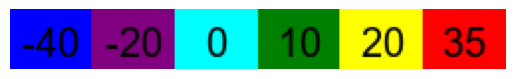

In [53]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

def create_colorbar(width, height, palette, vertical=True, add_labels=False, font_size=12, labels=None):
    # إنشاء صورة فارغة
    im = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(im)

    # رسم شريط الألوان
    for i, color in enumerate(palette):
        draw.rectangle([i * (width / len(palette)), 0, (i + 1) * (width / len(palette)), height], fill=color)

    # إضافة التسميات إذا لزم الأمر
    if add_labels and labels is not None:
        font = ImageFont.truetype("arial.ttf", font_size)  # تأكد من توفر الخط
        for i, label in enumerate(labels):
            text_size = draw.textbbox((0, 0), str(label), font=font)
            text_x = (i * (width / len(palette))) + (width / len(palette) - text_size[2]) / 2
            text_y = (height - text_size[3]) / 2  # موقع عمودي للنص
            draw.text((text_x, text_y), str(label), fill="black", font=font)

    return im  # إرجاع الصورة

# المتغيرات
width = 250
height = 30
palette = ["blue", "purple", "cyan", "green", "yellow", "red"]
labels = [-40, -20, 0, 10, 20, 35]

# إنشاء شريط الألوان
colorbar = create_colorbar(
    width=width,
    height=height,
    palette=palette,
    vertical=False,
    add_labels=True,
    font_size=20,
    labels=labels,
)

# عرض شريط الألوان في Jupyter Notebook
plt.imshow(np.array(colorbar))
plt.axis('off')  # إخفاء المحاور
plt.show()

# تصدير شريط الألوان كصورة
colorbar.save("colorbar.png")
